In [1]:
#importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\VishalChavan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [ ]:
# so we have 1000 rows and 8 clms

In [6]:
#cheaking missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#cheaking duplicate values
df.duplicated().sum()

0

In [ ]:
# we have neigther dup values and no missing values`

In [8]:
#check the null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#cheaking unique values in each clm
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
# data exploration
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [11]:
#defining numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


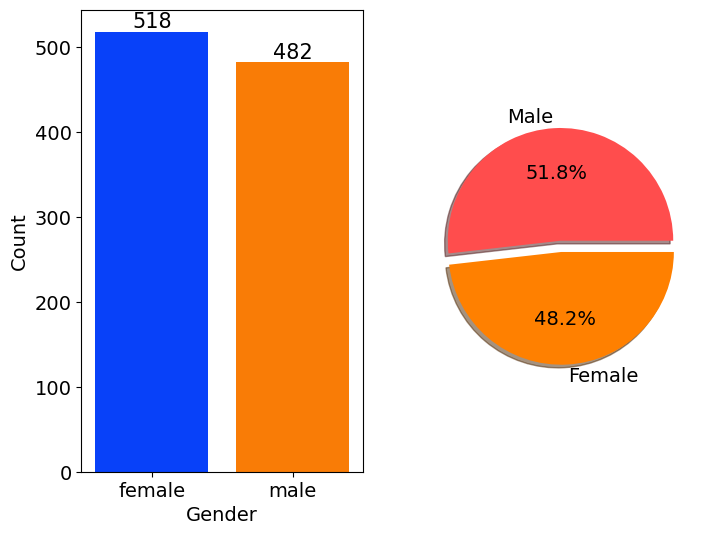

In [12]:
# Create a figure with two subplots
f,ax=plt.subplots(1,2,figsize=(8,6))


# Create a countplot of the 'gender' column and add labels to the bars
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Gender', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a pie chart of the 'gender' column and add labels to the slices
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'], textprops={'fontsize': 14})

# Display the plot
plt.show()

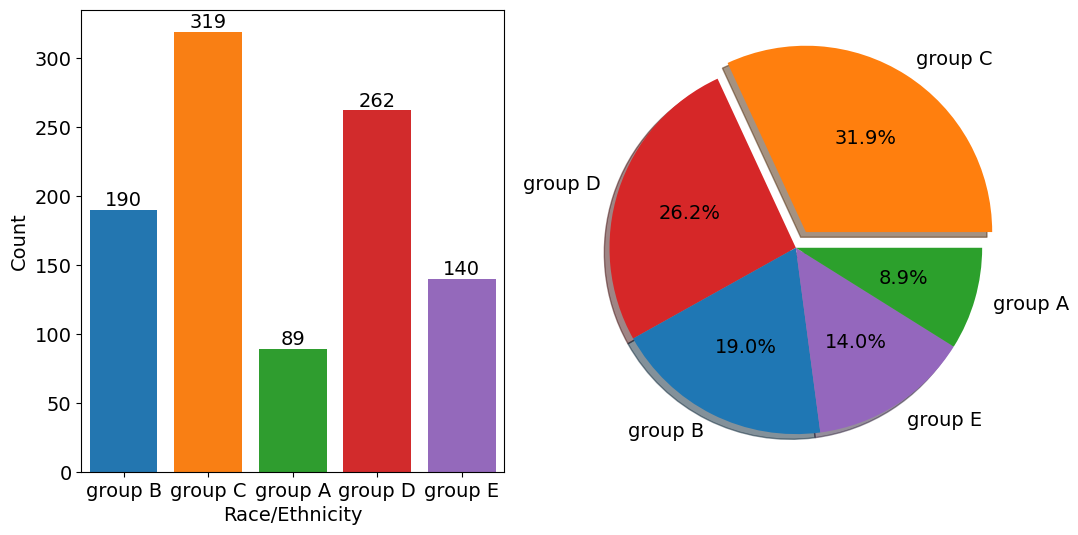

In [13]:
# Define a color palette for the countplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
# blue, orange, green, red, purple are respectiively the color names for the color codes used above

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of the 'race/ethnicity' column and add labels to the bars
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Set font size of x-axis and y-axis labels and tick labels
ax[0].set_xlabel('Race/Ethnicity', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(labelsize=14)

# Create a dictionary that maps category names to colors in the color palette
color_dict = dict(zip(df['race/ethnicity'].unique(), colors))

# Map the colors to the pie chart slices
pie_colors = [color_dict[race] for race in df['race/ethnicity'].value_counts().index]

# Create a pie chart of the 'race/ethnicity' column and add labels to the slices
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=pie_colors, textprops={'fontsize': 14})

# Set the aspect ratio of the pie chart to 'equal' to make it a circle
plt.axis('equal')

# Display the plot
plt.show()


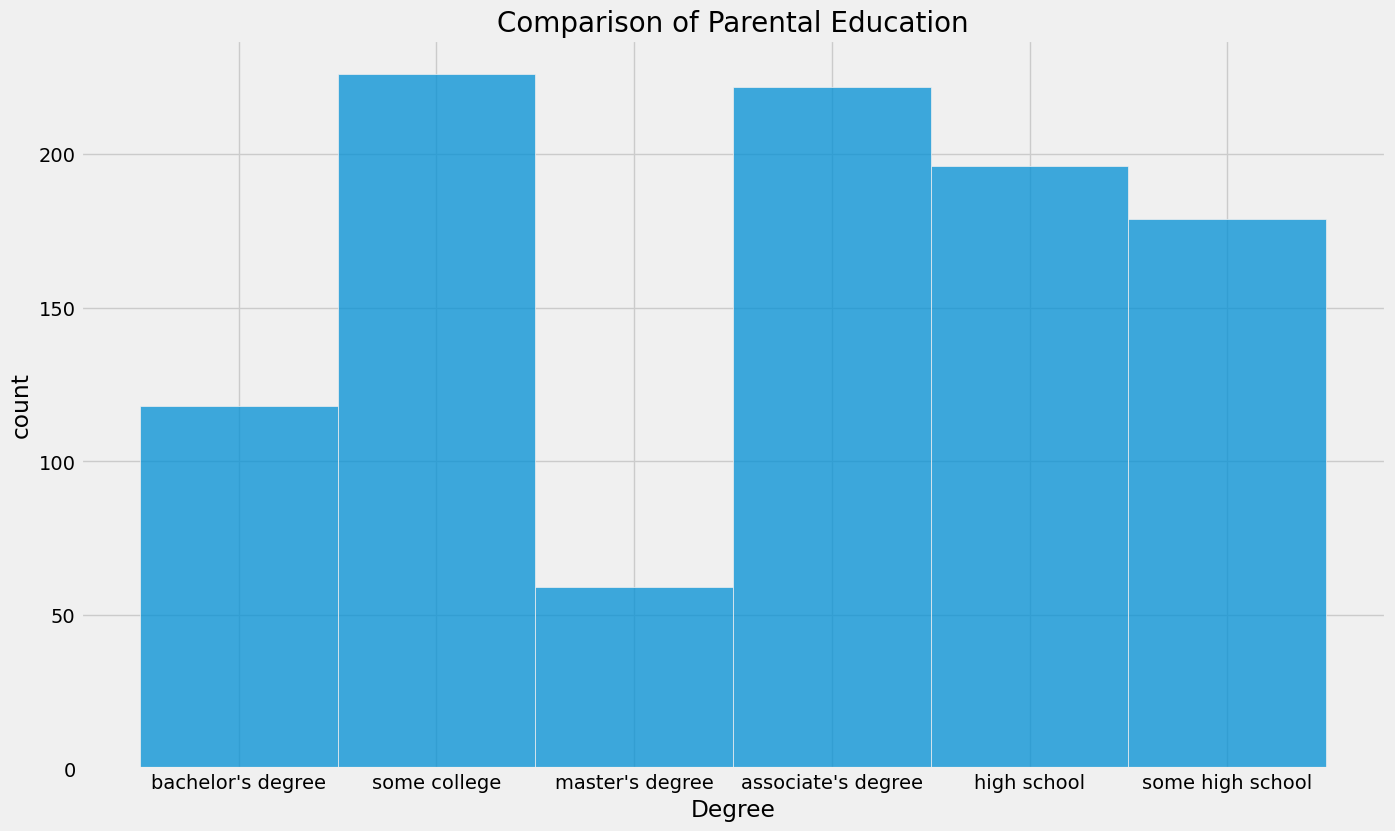

In [14]:
#comparing the parents education
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

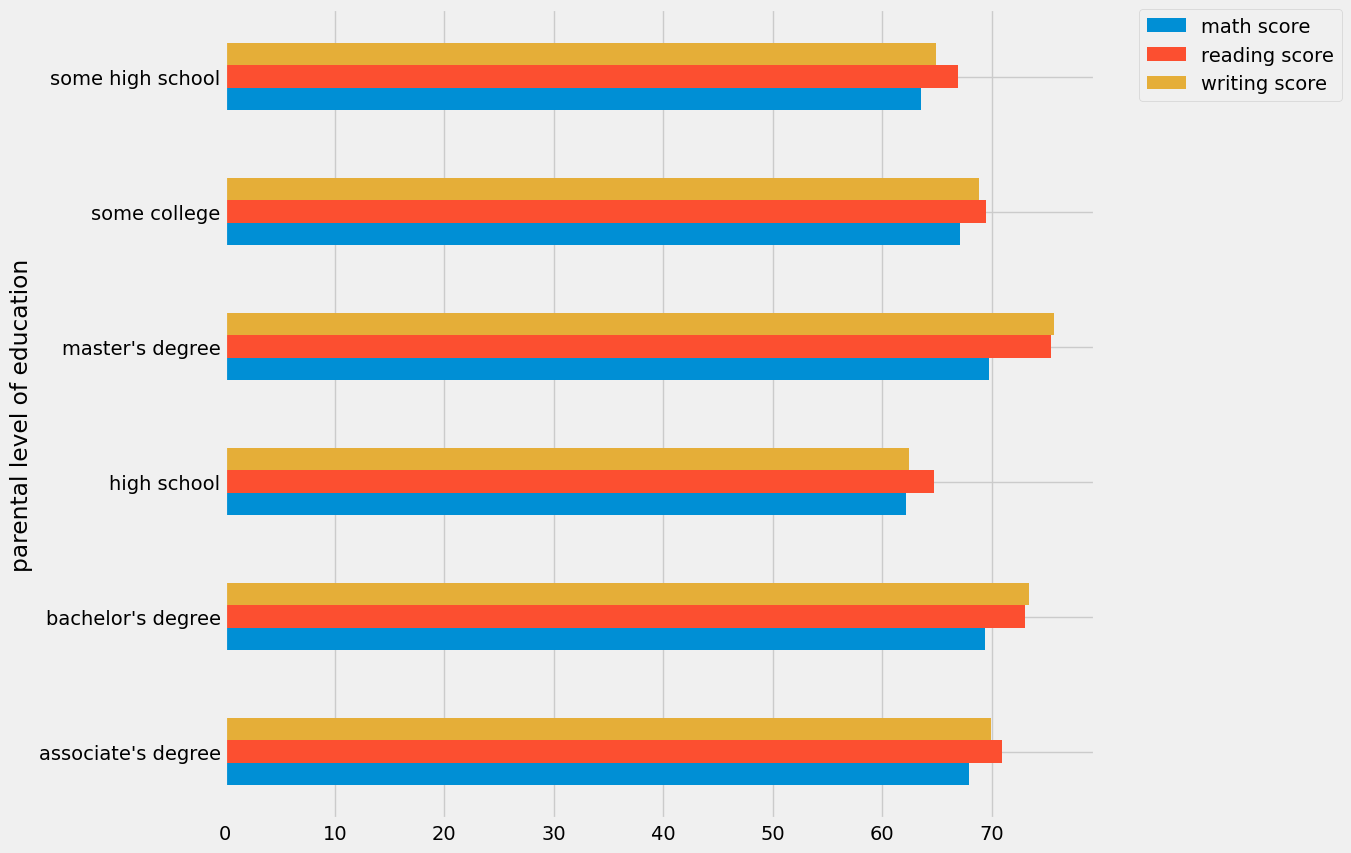

In [15]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#The score of student whose parents possess master and bachelor level education are higher than others.

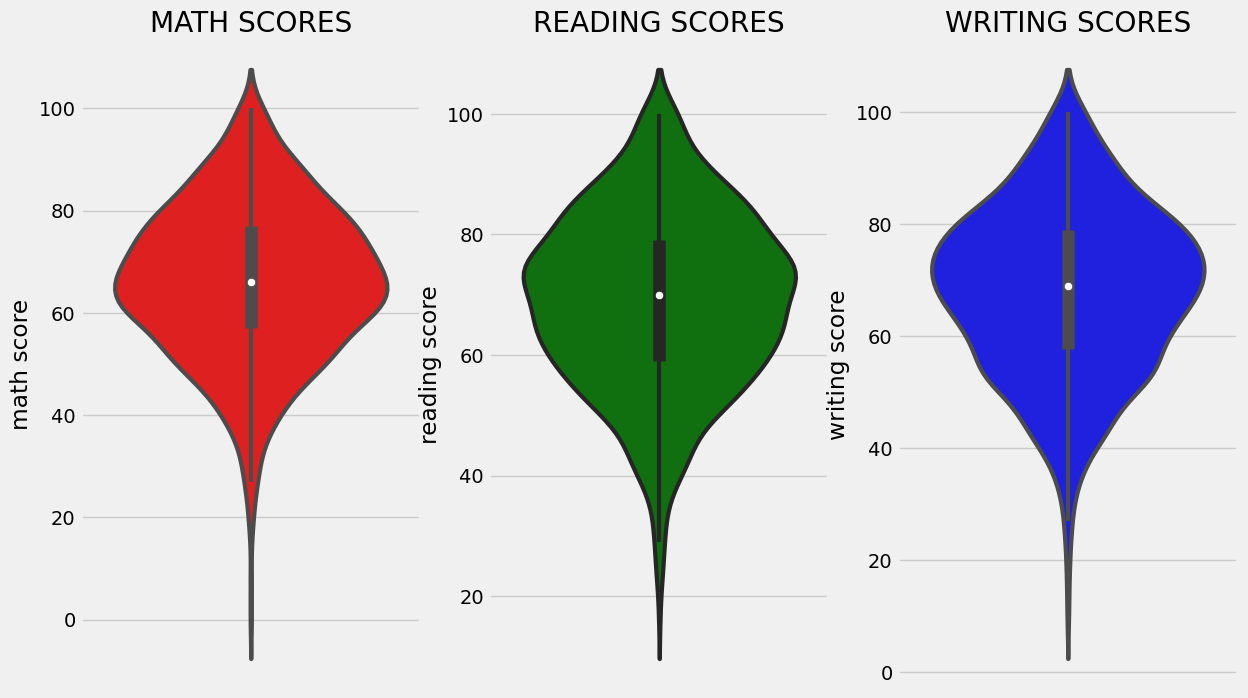

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1) 
plt.title('MATH SCORES') 
sns.violinplot(y='math score',data=df,color='red',linewidth=3) 
plt.subplot(1, 4, 2) 
plt.title('READING SCORES') 
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES') 
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3) 
plt.show()

In [ ]:
#From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

(-1.25, 1.25, -1.25, 1.25)

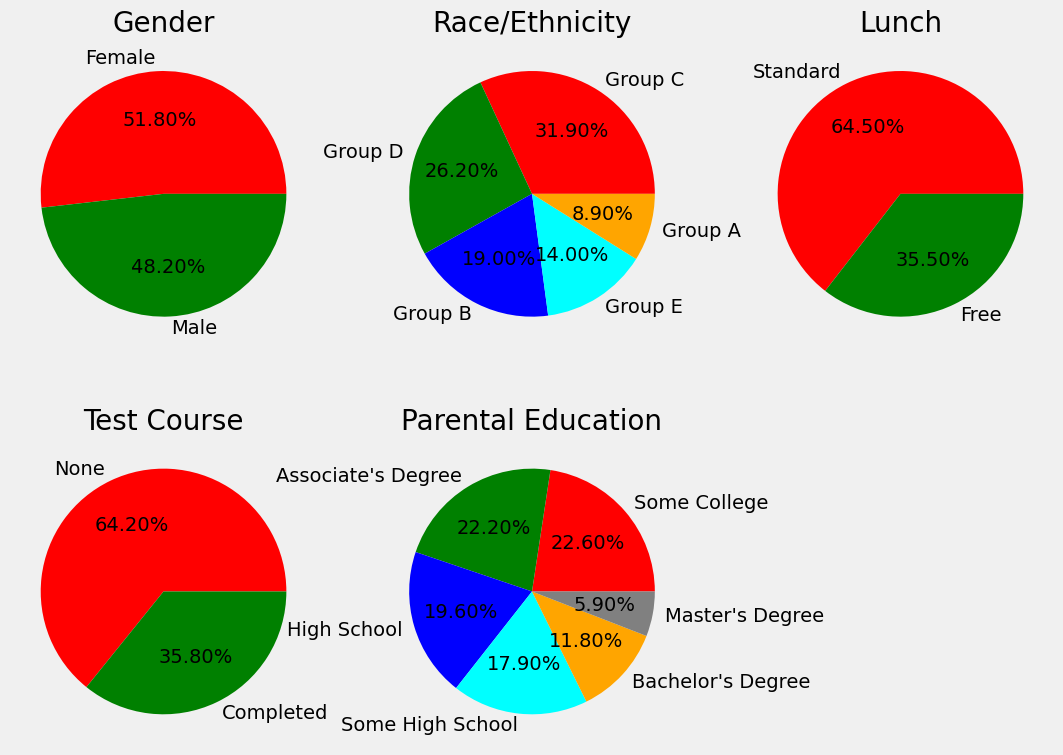

In [31]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

In [ ]:
The number of Male and Female students is almost equal.
The number of students is higher in Group C.
The number of students who have standard lunch is greater.
The number of students who have not enrolled in any test preparation course is greater.
The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.
From the above plot, it is clear that all the scores increase linearly with each other.

Student’s Performance is related to lunch, race, and parental level education.

Females lead in pass percentage and also are top-scorers.
Student Performance is not much related to test preparation course.
The finishing preparation course is beneficial.

In [39]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

In [40]:
#spliting x and y
X = df.drop(columns="math score",axis=1)
y = df["math score"] 

In [43]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns



numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( [ ("OneHotEncoder", oh_transformer, cat_features), ("StandardScaler", numeric_transformer, num_features), ] )
X = preprocessor.fit_transform(X)

In [44]:
#testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [45]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print('='*35) 
    print('\n')

<IPython.core.display.Javascript object>

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Squared Error: 28.3349
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Squared Error: 32.5523
- Mean Absolute Error: 4.5122
- R2 Score: 0.8556
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2634
- Mean Squared Error: 7.2634
- Mean Absolute Error

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
    "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                          'n_estimators': [8,16,32,64,128,256]},
    "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
    "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}
}

model_list = []
r2_list =[]
for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model, 
        param_grid[model_name], 
        scoring=scorer, 
        cv=5,
        n_jobs=-1
    )

In [57]:
grid_search.fit(X_train, y_train) 
# Make predictions 
y_train_pred = grid_search.predict(X_train) 
y_test_pred = grid_search.predict(X_test) 
# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 
print(model_name) 
model_list.append(model_name) 
print('Best hyperparameters:', grid_search.best_params_) 
print('Model performance for Training set') 
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2)) 
print('----------------------------------') 
print('Model performance for Test set') 
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
print("- Mean Squared Error: {:.4f}".format(model_test_rmse)) 
print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
print("- R2 Score: {:.4f}".format(model_test_r2))
r2_list.append(model_test_r2) 
print('='*35)
print('\n')

AdaBoost Regressor
Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 128}
Model performance for Training set
- Root Mean Squared Error: 5.7926
- Mean Squared Error: 33.5541
- Mean Absolute Error: 4.7463
- R2 Score: 0.8512
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0716
- Mean Squared Error: 6.0716
- Mean Absolute Error: 4.7453
- R2 Score: 0.8485




In [59]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,AdaBoost Regressor,0.848506


In [ ]:
# we got accuracy as 84%